# Residential models - hyperparameter tuning

In [1]:
from model_builder_new import *
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
# Set the model CV search conditions
unique_depths = [3, 5, 7]
unique_n_estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]

In [3]:
# Set up models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso
dmr = DummyRegressor(strategy='mean')
random_forest = RandomForestRegressor()
xgb = XGBRegressor()

## Electric heating

In [4]:
predictors, targets, sc, names = get_targets_predictors('heating', 'elec', res = True)
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, random_state=0)

res_elec_heating_use_targets.pkl
res_elec_heating_all_predictors.pkl
(6010, 183)


### Baseline

In [5]:
# Fit mean baseline
dmr.fit(X_train, y_train)
preds = dmr.predict(X_test)
print("R^2 score = {}".format(dmr.score(preds, y_test)))

-0.0001516064645763482

### Random forest regressor

In [6]:
# Grid search
gscv_elec_rf = grid_search_xgbr(predictors, targets.values.ravel(), unique_depths, unique_n_estimators, random_forest)

In [7]:
# Plot results
plot_gs_results(gscv_elec_rf, unique_depths, unique_n_estimators)

### XGBoost

In [8]:
# Grid search
gscv_elec_xgb = grid_search_xgbr(predictors, targets.values.ravel(), unique_depths, unique_n_estimators, xgb)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.460, total=   0.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.457, total=   0.9s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.503, total=   0.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.499, total=   0.9s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

[CV] ....... max_depth=3, n_estimators=200, score=0.536, total=   7.6s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  2.5min remaining:    0.0s
[CV] max_depth=3, n_estimators=200 ...................................
[CV] ....... max_depth=3, n_estimators=200, score=0.596, total=   7.9s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  2.6min remaining:    0.0s
[CV] max_depth=3, n_estimators=200 ...................................
[CV] ....... max_depth=3, n_estimators=200, score=0.579, total=  10.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  2.8min remaining:    0.0s
[CV] max_depth=3, n_estimators=200 ...................................
[CV] ....... max_depth=3, n_estimators=200, score=0.567, total=   6.9s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.9min remaining:    0.0s
[CV] max_depth=3, n_estimators=225 ...................................
[CV] ....... max_depth=3, n_estimators=225, score=0.514, total=   7.1s
[Parallel(n_jobs=1)]: Done  41 out of  41

[CV] ....... max_depth=5, n_estimators=125, score=0.579, total=   5.9s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:  5.5min remaining:    0.0s
[CV] max_depth=5, n_estimators=125 ...................................
[CV] ....... max_depth=5, n_estimators=125, score=0.538, total=   5.9s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  5.6min remaining:    0.0s
[CV] max_depth=5, n_estimators=150 ...................................
[CV] ....... max_depth=5, n_estimators=150, score=0.515, total=   6.8s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:  5.8min remaining:    0.0s
[CV] max_depth=5, n_estimators=150 ...................................
[CV] ....... max_depth=5, n_estimators=150, score=0.536, total=   6.8s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:  5.9min remaining:    0.0s
[CV] max_depth=5, n_estimators=150 ...................................
[CV] ....... max_depth=5, n_estimators=150, score=0.602, total=   6.8s
[Parallel(n_jobs=1)]: Done  78 out of  78

[CV] ....... max_depth=7, n_estimators=100, score=0.583, total=   6.6s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] ....... max_depth=7, n_estimators=100, score=0.558, total=   6.3s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] ....... max_depth=7, n_estimators=100, score=0.522, total=   6.3s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] ....... max_depth=7, n_estimators=125, score=0.512, total=   7.8s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] ....... max_depth=7, n_estimators=125, score=0.500, total=   7.8s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] ....... max_depth=7, n_estimators=125, score=0.585, total=   7.9s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] ....... max_depth=7, n_estimators=125, score=0.560, total=   7.9s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] .

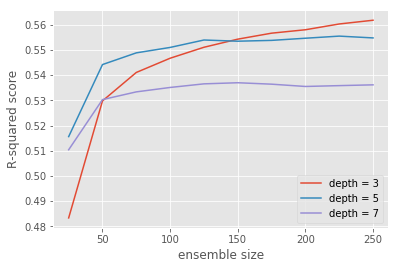

In [9]:
# Plot results
plot_gs_results(gscv_elec_xgb, unique_depths, unique_n_estimators, 'res_heating.png')

## Electric cooling

In [10]:
predictors, targets, sc, names = get_targets_predictors('cooling', 'elec', res = True)
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, random_state=1)

res_elec_cooling_use_targets.pkl
res_elec_cooling_all_predictors.pkl
(14889, 183)


### Baseline 

In [11]:
# Fit mean baseline
dmr.fit(X_train, y_train)
preds = dmr.predict(X_test)
print("R^2 score = {}".format(dmr.score(preds, y_test)))

-0.000544467558201589

### Random forest regressor

In [12]:
# Grid search
gscv_elec_rf = grid_search_xgbr(predictors, targets.values.ravel(), unique_depths, unique_n_estimators, random_forest)

In [13]:
# Plot results
plot_gs_results(gscv_elec_rf, unique_depths, unique_n_estimators)

### XGBoost

In [14]:
# Grid search
gscv_elec_xgb = grid_search_xgbr(predictors, targets.values.ravel(), unique_depths, unique_n_estimators, xgb)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.623, total=   2.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.601, total=   2.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.638, total=   2.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s remaining:    0.0s
[CV] max_depth=3, n_estimators=25 ....................................
[CV] ........ max_depth=3, n_estimators=25, score=0.586, total=   2.1s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

[CV] ....... max_depth=3, n_estimators=200, score=0.667, total=  16.1s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  5.3min remaining:    0.0s
[CV] max_depth=3, n_estimators=200 ...................................
[CV] ....... max_depth=3, n_estimators=200, score=0.713, total=  16.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  5.5min remaining:    0.0s
[CV] max_depth=3, n_estimators=200 ...................................
[CV] ....... max_depth=3, n_estimators=200, score=0.699, total=  16.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  5.8min remaining:    0.0s
[CV] max_depth=3, n_estimators=200 ...................................
[CV] ....... max_depth=3, n_estimators=200, score=0.702, total=  16.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  6.1min remaining:    0.0s
[CV] max_depth=3, n_estimators=225 ...................................
[CV] ....... max_depth=3, n_estimators=225, score=0.720, total=  17.9s
[Parallel(n_jobs=1)]: Done  41 out of  41

[CV] ....... max_depth=5, n_estimators=125, score=0.728, total=  14.3s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed: 12.6min remaining:    0.0s
[CV] max_depth=5, n_estimators=125 ...................................
[CV] ....... max_depth=5, n_estimators=125, score=0.709, total=  14.3s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 12.9min remaining:    0.0s
[CV] max_depth=5, n_estimators=150 ...................................
[CV] ....... max_depth=5, n_estimators=150, score=0.737, total=  17.2s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed: 13.2min remaining:    0.0s
[CV] max_depth=5, n_estimators=150 ...................................
[CV] ....... max_depth=5, n_estimators=150, score=0.661, total=  17.1s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed: 13.5min remaining:    0.0s
[CV] max_depth=5, n_estimators=150 ...................................
[CV] ....... max_depth=5, n_estimators=150, score=0.740, total=  17.2s
[Parallel(n_jobs=1)]: Done  78 out of  78

[CV] ....... max_depth=7, n_estimators=100, score=0.729, total=  15.8s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] ....... max_depth=7, n_estimators=100, score=0.721, total=  15.5s
[CV] max_depth=7, n_estimators=100 ...................................
[CV] ....... max_depth=7, n_estimators=100, score=0.698, total=  15.5s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] ....... max_depth=7, n_estimators=125, score=0.720, total=  19.8s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] ....... max_depth=7, n_estimators=125, score=0.664, total=  19.3s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] ....... max_depth=7, n_estimators=125, score=0.728, total=  19.2s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] ....... max_depth=7, n_estimators=125, score=0.723, total=  19.6s
[CV] max_depth=7, n_estimators=125 ...................................
[CV] .

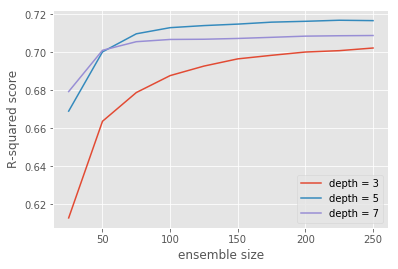

In [15]:
# Plot results
plot_gs_results(gscv_elec_xgb, unique_depths, unique_n_estimators, 'res_cooling.png')